# Saul's Jupyter Playground

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
sns.set(style="darkgrid")

## Contest Data

In [11]:
df = pd.read_csv('data/Contests.csv')
df.head()
#df.tail()

,ContestId,SportName,VariantName,GameSet,ContestName,ContestStartDatetimeEST,ContestEndDatetimeEST,ContestPayoutDatetimeEST,EntryFeeAmount,TotalPrizeAmount,MaxNumberPlayers,MaxEntriesPerUser,Entries,DistinctUsers,Contest_Group,NumGames,DraftablePlayersInSet,PaidUsersInDraftGroup,TopPrize,MaxPayoutPosition
0,7963004,NFL,Classic,(Main),NFL $25K Quarter Arcade [Just $0.25!],2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,0.25,25000.0,117500,100,117500.0,38925,Headliner,15,910.0,668396,2000.0,23665
1,7963437,NFL,Classic,(Main),"NFL GIANT $2 Booster [Top 1,250 Win $20]",2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,2.00,25000.0,14375,100,14375.0,9663,Booster,15,910.0,668396,20.0,1250
2,8296224,NFL,Classic,(Main),Beginner NFL $5K Spy [Single Entry],2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,100.00,5000.0,55,1,55.0,55,SingleEntry,15,910.0,668396,1100.0,11
3,8296543,NFL,Classic,(Main),NFL $50 Double Up [$5K Gtd] (Multi-Entry),2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,50.00,5000.0,111,11,111.0,79,FeaturedDoubleUp,15,910.0,668396,100.0,50
4,8296544,NFL,Classic,(Main),NFL $50 Double Up [$5K Gtd] (Multi-Entry),2015-09-13 13:00:00.000,2015-09-14 22:20:00.000,2015-09-15 02:27:24.000,50.00,5000.0,111,11,111.0,91,FeaturedDoubleUp,15,910.0,668396,100.0,50


In [12]:
df.dtypes

ContestId                     int64
SportName                    object
VariantName                  object
GameSet                      object
ContestName                  object
ContestStartDatetimeEST      object
ContestEndDatetimeEST        object
ContestPayoutDatetimeEST     object
EntryFeeAmount              float64
TotalPrizeAmount            float64
MaxNumberPlayers              int64
MaxEntriesPerUser             int64
Entries                     float64
DistinctUsers                 int64
Contest_Group                object
NumGames                      int64
DraftablePlayersInSet       float64
PaidUsersInDraftGroup         int64
TopPrize                    float64
MaxPayoutPosition             int64
dtype: object

^^^ The fact that EntryFeeAmount thru MaxPayoutPosition are all float64/int64 is a pretty good indication that we aren't missing data there! 

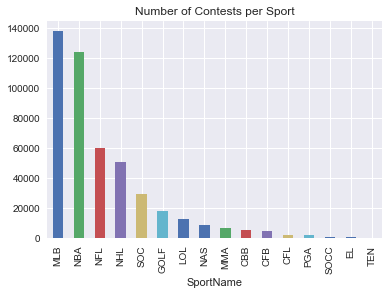

In [13]:
counts = df.groupby('SportName')['ContestId'].nunique().sort_values(ascending=False)
counts.plot(kind='bar', title="Number of Contests per Sport")

## Time Series Data

In [14]:
timeDF = pd.read_csv('data/WPI/2017-09.csv', header=None)
timeDF.columns = ['ContestID', 'MinutesRemaining', 'Entries']
timeDF.tail()

,ContestID,MinutesRemaining,Entries
4073938,45735562,24,2
4073939,45735562,25,1
4073940,45735562,26,2
4073941,45735562,27,2
4073942,45735562,28,1


In [15]:
timeDF = timeDF.pivot(index='ContestID', columns='MinutesRemaining', values='Entries')
timeDF.head()

MinutesRemaining,0,1,2,3,4,5,6,7,8,9,...,47411,47412,47413,47414,47415,47416,47417,47418,47419,47421
ContestID,,,,,,,,,,,,,,,,,,,,,
43229169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43229170,14.0,1714.0,1599.0,1449.0,1366.0,1408.0,1268.0,1240.0,1230.0,1189.0,...,27.0,8.0,13.0,9.0,5.0,3.0,4.0,6.0,1.0,21.0
43229171,20.0,1277.0,865.0,801.0,641.0,702.0,566.0,417.0,626.0,606.0,...,2.0,NaN,4.0,1.0,2.0,1.0,NaN,3.0,NaN,NaN
43229271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43231454,NaN,2.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
timeDF.dropna()

MinutesRemaining,0,1,2,3,4,5,6,7,8,9,...,47411,47412,47413,47414,47415,47416,47417,47418,47419,47421
ContestID,,,,,,,,,,,,,,,,,,,,,
